In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import numpy as np

train_csv = pd.read_csv('/content/drive/MyDrive/DeepLearning/digit_recognizer/digit-recognizer/train.csv')

test_csv = pd.read_csv('/content/drive/MyDrive/DeepLearning/digit_recognizer/digit-recognizer/test.csv')

In [9]:
train_csv.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
train_list = train_csv.values.tolist()

test_list = test_csv.values.tolist()

In [48]:
train_X = np.array([data[1:] for data in train_list]).reshape((-1, 28,28))
train_y = np.array([data[0] for data in train_list])

test_X = np.array([data for data in test_list]).reshape((-1, 28,28))
test_y = np.array([-1 for data in test_list])

In [49]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (42000, 28, 28)
Y_train: (42000,)
X_test:  (28000, 28, 28)
Y_test:  (28000,)


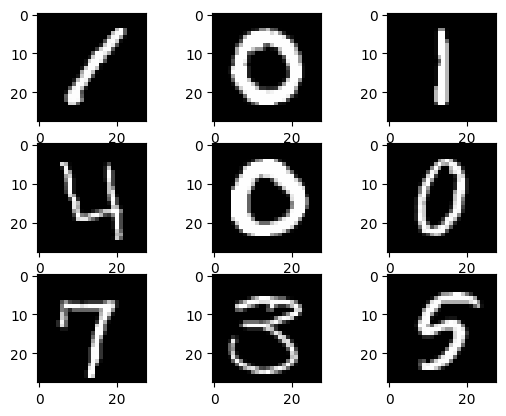

In [50]:
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [51]:
train_X = train_X/255
test_X = test_X/255

In [52]:
from torch.utils.data import Dataset
import torch

class MNISTDataset(Dataset):
    def __init__(self, data, labels):
        # Convert data to PyTorch tensors
        self.data = torch.from_numpy(data).float()
        self.labels = torch.from_numpy(labels).long()

        # Reshape data: MNIST data comes in shape (n_samples, 28, 28)
        # PyTorch Conv layers expect data in the shape (n_samples, n_channels, height, width)
        self.data = self.data.unsqueeze(1)  # Adds a channel dimension

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create PyTorch datasets
train_dataset = MNISTDataset(train_X, train_y)
test_dataset = MNISTDataset(test_X, test_y)

In [53]:
import torch.nn as nn

class CustomNetwork(nn.Module):
    def __init__(self):
        super(CustomNetwork, self).__init__()
        # Define network layers
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.flat = nn.Flatten()
        self.out = nn.Linear(64*7*7, 10)



    def forward(self, x):
        # Define the forward pass
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.flat(x)
        output = self.out(x)
        return output, x

In [54]:
import torch.optim as optim

# Assuming you have defined your 'CustomNetwork' class as provided
model = CustomNetwork()

# Define the loss function
loss_function = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)  # You can adjust the learning rate as needed

In [55]:
from torch.utils.data import DataLoader

# Define batch size
batch_size = 128  # You can adjust this according to your needs

# Create a DataLoader for your training dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [56]:
# Assuming 'model', 'loss_function', and 'optimizer' are already defined

# Set the model to training mode
model.train()

# Number of epochs
num_epochs = 10  # You can adjust the number of epochs

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs, _ = model(inputs)  # Assuming your model returns output and something else
        loss = loss_function(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f'Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print('Finished Training')

Epoch: 1, Batch: 100, Loss: 0.7847
Epoch: 1, Batch: 200, Loss: 0.1486
Epoch: 1, Batch: 300, Loss: 0.1065
Epoch: 2, Batch: 100, Loss: 0.0848
Epoch: 2, Batch: 200, Loss: 0.0776
Epoch: 2, Batch: 300, Loss: 0.0751
Epoch: 3, Batch: 100, Loss: 0.0588
Epoch: 3, Batch: 200, Loss: 0.0678
Epoch: 3, Batch: 300, Loss: 0.0631
Epoch: 4, Batch: 100, Loss: 0.0629
Epoch: 4, Batch: 200, Loss: 0.0561
Epoch: 4, Batch: 300, Loss: 0.0589
Epoch: 5, Batch: 100, Loss: 0.0543
Epoch: 5, Batch: 200, Loss: 0.0455
Epoch: 5, Batch: 300, Loss: 0.0617
Epoch: 6, Batch: 100, Loss: 0.0439
Epoch: 6, Batch: 200, Loss: 0.0505
Epoch: 6, Batch: 300, Loss: 0.0548
Epoch: 7, Batch: 100, Loss: 0.0481
Epoch: 7, Batch: 200, Loss: 0.0410
Epoch: 7, Batch: 300, Loss: 0.0473
Epoch: 8, Batch: 100, Loss: 0.0411
Epoch: 8, Batch: 200, Loss: 0.0451
Epoch: 8, Batch: 300, Loss: 0.0497
Epoch: 9, Batch: 100, Loss: 0.0390
Epoch: 9, Batch: 200, Loss: 0.0418
Epoch: 9, Batch: 300, Loss: 0.0547
Epoch: 10, Batch: 100, Loss: 0.0375
Epoch: 10, Batch: 2

In [57]:
from torch.utils.data import DataLoader

# Define batch size for test loader (can be larger than the training batch size)
test_batch_size = 128  # Adjust as needed

# Create a DataLoader for your test dataset
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

In [60]:
# Assuming 'model' is your trained model

# Set the model to evaluation mode
model.eval()

# To measure accuracy
correct = 0
total = 0

pred_result = []

# Disable gradient calculations
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # Forward pass
        outputs, _ = model(images)  # Get the model output for the batch

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)

        pred_result.extend(list(predicted.numpy()))
        # Total number of labels
        total += labels.size(0)

        # Total correct predictions
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')

Accuracy of the model on the test dataset: 0.00%


In [61]:
len(pred_result)

28000

In [62]:
image_ids = range(1, len(pred_result) + 1)

# Creating the DataFrame
df = pd.DataFrame({
    'ImageId': image_ids,
    'Label': pred_result
})

In [65]:
df.to_csv('/content/drive/MyDrive/DeepLearning/digit_recognizer/digit-recognizer/test_pred.csv', index=False)